### Python for Data Analysis

- Python for Data Analysis is the foundation of modern data science. 
- It allows you to load, clean, transform, explore, visualize, and model data in a way that is intuitive and powerful. 
- Whether you're analyzing sales data, exploring survey responses or working with images, Python gives you the tools to turn raw data into actionable insights.

In this course, you’ll learn how to work with key libraries that form the Python data stack:

- NumPy – Numerical computing
- Pandas – Data manipulation
- Matplotlib & Seaborn – Data visualization

### NumPy – The Foundation of Data Analysis

#### What is NumPy?
NumPy (Numerical Python) is a Python library used for working with n-dimensional arrays and performing high-performance mathematical operations on them.

Numpy provides techniques for effectively loading, storing, and manipulating in-memory data in Python. 

Key Features:
- Efficient operations on large datasets
- Much faster than Python lists
- Enables vectorized computing (no loops required!)
- Supports linear algebra, statistics, random sampling and more

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.

### Python Data Types

- Effective data-driven science and computation requires understanding how data is stored and manipulated.
- This section outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this. 




In [2]:
x = 4 
x = "four"
x

'four'

```c
/* C code */
int x = 4;
x = "four";  // FAILS
```

### A Python Integer Is More Than Just an Integer

- The standard Python implementation is written in C. 
- This means that every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. 
- For example, when we define an integer in Python, such as `x = 10000`, x is not just a “raw” integer. It’s actually a pointer to a compound C structure, which contains several values.
- the integer (long) type definition effectively looks like this (once the C macros are expanded):

``` c 
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- `ob_refcnt`, a reference count that helps Python silently handle memory allocation and deallocation
- `ob_type`, which encodes the type of the variable
- `ob_size`, which specifies the size of the following data members
- `ob_digit`, which contains the actual integer value that we expect the Python variable to represent.

Thus: “There is some overhead in storing an integer in Python as compared to an integer in a compiled language like C.”

This means that:

- In Python, even something as simple as an integer (e.g., 5) is stored as a full Python object.
- That object includes not just the number itself, but also metadata like type info, reference count, and other internal details.
- This makes Python very flexible but also slower and more memory-intensive.

By contrast:

- In a compiled language like C, an integer is stored as a fixed-size binary value (e.g., 4 bytes for an int).
- It has no extra information—just the raw number—making it much faster and more memory-efficient.

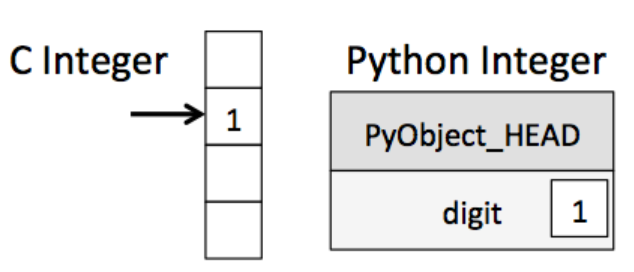



Here PyObject_HEAD is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here:

- a C integer is essentially a label for a position in memory whose bytes encode an integer value. 
- A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.
- This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. 

### A Python List Is More Than Just a List

- The standard mutable multi-element container in Python is the list.
- We can create a list of integers as follows:

In [118]:
# L = list(range(10))
# L
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [119]:
type(L[0])

int

In [120]:
# list of strings
# L2 = ["a", "b", "c"]
# L2
L2 = ["a", "b", "c"]
L2

['a', 'b', 'c']

In [14]:
type(L2[0])

str

Because of Python’s dynamic typing, we can even create heterogeneous lists:

In [121]:
# L3 = ["True", 1, 3.14, "Hello"]
# L3
L3 = ["True", 1, 3.14, "Hello"]
L3

['True', 1, 3.14, 'Hello']

In [122]:
# [type(item) for item in L3]
[type(item) for item in L3]

[str, int, float, str]

- But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. 
- In the special case that all variables are of the same type, much of this information is redundant:
- it can be much more efficient to store data in a fixed-type array. 
- The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

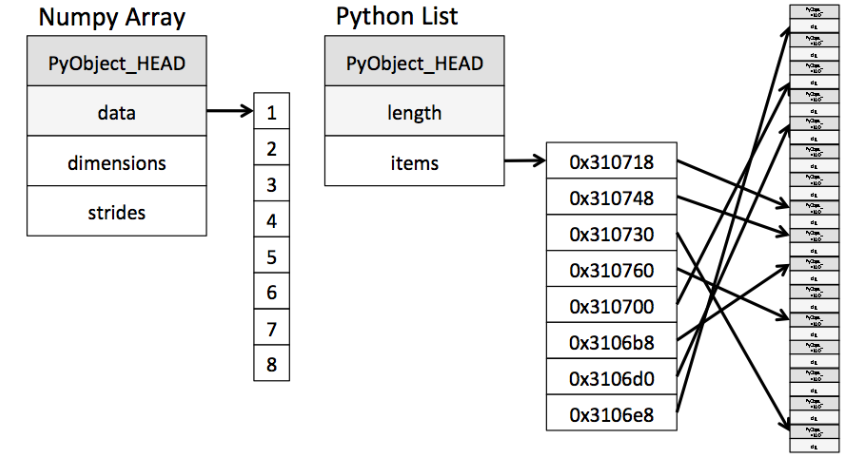

- At the implementation level, the array essentially contains a single pointer to one contiguous block of data. 
- The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. 
- Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.

### Fixed-Type Arrays in Python

Python offers several different options for storing data in efficient, fixed-type data buffers.

In [16]:
import array

In [123]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [124]:
A = array.array("i", L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Much more useful, however, is the `ndarray` object of the NumPy package.
- While Python’s array object provides efficient storage of array-based data, NumPy adds to this efficient operations on that data.

### Creating Arrays from Python Lists

In [19]:
# importing the library
import numpy as np

First, we can use `np.array` to create arrays from Python lists

In [125]:
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [126]:
np.array(L)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Unlike Python lists, NumPy is constrained to arrays that all contain the same type.
- If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [127]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the dtype keyword:

In [23]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

- Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; 
- here’s one way of initializing a multidimensional array using a list of lists:

In [128]:
# nested lists result in multi-dimensional arrays
# np.array([[1, 2, 3], [4, 5, 6]])
np.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [130]:
np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

### 1D Array (One-Dimensional)
A 1D array is like a list or a vector — just a single row of elements.

In [131]:
a = np.array([1, 2, 3, 4, 5])
print(a.shape)

(5,)


### 2D Array (Two-Dimensional)
A 2D array is like a table or matrix — rows and columns.

In [132]:
b = np.array([[1, 2, 3],
              [4, 5, 6]])
print(b.shape)   # (2, 3)

(2, 3)


### 3D Array (Three-Dimensional)
A 3D array is like a stack of 2D arrays — multiple "pages" or "layers."

In [133]:
c = np.array([[[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]]])
print(c.shape)   # (1, 3, 3)

(1, 3, 3)


In [134]:
d = np.array([
  [[1, 2], [3, 4]],   # Matrix 1
  [[5, 6], [7, 8]]    # Matrix 2
])
print(d.shape) 

(2, 2, 2)


### Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.

In [136]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
# Create a 3x5 floating-point array filled with ones
np.ones((3,5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [140]:
# Create a 3x5 array filled with 3.14
np.full((3,5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [141]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [39]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [40]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3,3))

array([[0.26565998, 0.05823487, 0.42355511],
       [0.46978505, 0.91623665, 0.84999898],
       [0.07222327, 0.27360829, 0.1805423 ]])

In [41]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0,1, (3,3))

array([[ 0.30165813, -0.41464507,  1.30379221],
       [ 1.12703781, -1.67007323, -0.45914238],
       [ 0.41090001, -1.07161261, -0.57595574]])

In [42]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0,10, (3,3))

array([[3, 0, 4],
       [7, 2, 3],
       [1, 4, 1]], dtype=int32)

In [43]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [142]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3, dtype=int)

array([1, 2, 3])

### Data manipulation in Python

We’ll cover a few categories of basic array manipulations here:

- `Attributes of arrays`: Determining the size, shape, memory consumption, and data types of arrays
- `Indexing of arrays`: Getting and setting the value of individual array elements
- `Slicing of arrays`: Getting and setting smaller subarrays within a larger array
- `Reshaping of arrays`: Changing the shape of a given array
- `Joining and splitting of arrays`: Combining multiple arrays into one, and splitting one array into many

#### NumPy Array Attributes

- We’ll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
- We’ll use NumPy’s random number generator, which we will seed with a set value in order to ensure that the same random arrays are generated each time this code is run. 

In [149]:
np.random.seed(42)  # Set seed for reproducibility
# Create a one-dimensional array of 10 random values
x1 = np.random.randint(10, size=10, dtype=int)


# # Create a two-dimensional array of shape (3, 4) with random values
x2 = np.random.randint(10, size=(3, 4))

# # Create a three-dimensional array of shape (2, 3, 4) with random values
x3 = np.random.randint(10, size=(2, 3, 4))

In [ ]:
# print(x1)
# print(x2)
# print(x3)

[[[9 5 8 0 9]
  [2 6 3 8 2]
  [4 2 6 4 8]
  [6 1 3 8 1]]

 [[9 8 9 4 1]
  [3 6 7 2 0]
  [3 1 7 3 1]
  [5 5 9 3 5]]

 [[1 9 1 9 3]
  [7 6 8 7 4]
  [1 4 7 9 8]
  [8 0 8 6 8]]]


In [150]:
x1

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4], dtype=int32)

In [152]:
print("x1 ndim: ", x1.ndim)
print("x1 shape: ", x1.shape)
print("x1 size: ", x1.size)

x1 ndim:  1
x1 shape:  (10,)
x1 size:  10


Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array):

In [153]:
x3

array([[[9, 5, 8, 0],
        [9, 2, 6, 3],
        [8, 2, 4, 2]],

       [[6, 4, 8, 6],
        [1, 3, 8, 1],
        [9, 8, 9, 4]]], dtype=int32)

In [154]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (2, 3, 4)
x3 size:  24


Another useful attribute is the `dtype`,

In [56]:
print("x3 dtype:", x3.dtype)

x3 dtype: int32


Other attributes include `itemsize`, which lists the size (in bytes) of each array element, and `nbytes`, which lists the total size (in bytes) of the array:

In [155]:
x3

array([[[9, 5, 8, 0],
        [9, 2, 6, 3],
        [8, 2, 4, 2]],

       [[6, 4, 8, 6],
        [1, 3, 8, 1],
        [9, 8, 9, 4]]], dtype=int32)

In [156]:
print("itemsize: ", x3.itemsize)
print("nbytes: ", x3.nbytes)

itemsize:  4
nbytes:  96


### Array Indexing: Accessing Single Elements

In [157]:
x1

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4], dtype=int32)

In [159]:
print(x1[2])  # Access the first element

7


In [161]:
print(x1[-2])  # Access the last element

7


In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices

In [162]:
x2

array([[3, 7, 7, 2],
       [5, 4, 1, 7],
       [5, 1, 4, 0]], dtype=int32)

In [164]:
#x2[0, 0]  # Access the first row, first column
#print(x2[1, 1])
print(x2[2,3])


0


In [68]:
x2[1,1]  # Access the second row, second column

np.int32(4)

In [165]:
x2

array([[3, 7, 7, 2],
       [5, 4, 1, 7],
       [5, 1, 4, 0]], dtype=int32)

Values can also be modified using any of the above index notation:

In [166]:
x2[1,0] = 12
x2 # Check the modified value

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 5,  1,  4,  0]], dtype=int32)

- Unlike Python lists, NumPy arrays have a fixed type. 
- This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated.

In [167]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 5,  1,  4,  0]], dtype=int32)

In [169]:
x2[2,0] = 3.14
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character.

The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array x, use this:

`x[start:stop:step]`

If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1.

#### One-dimensional subarrays

In [171]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [173]:
# first five elements
x[:5]  # Access elements from index 0 to 4

array([0, 1, 2, 3, 4])

In [174]:
# elements from index 5 to the end
x[5:]  

array([5, 6, 7, 8, 9])

In [175]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [176]:
# middle sub-array
x[4:7]

array([4, 5, 6])

In [177]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [178]:

x[::2] # Access every second element

array([0, 2, 4, 6, 8])

In [ ]:
x[1::2]  # Access every second element, starting from index 1

array([1, 3, 5, 7, 9])

In [180]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [179]:
x[::-1]  # Reverse the array

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [181]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [182]:
x[5::-1]  # Access elements from index 5 to the end in reverse order

array([5, 4, 3, 2, 1, 0])

#### Multi-dimensional subarrays

In [183]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [184]:
x2[:2, :3]  # Access the first two rows and first three columns

array([[ 3,  7,  7],
       [12,  4,  1]], dtype=int32)

In [188]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [192]:
x2[1:, 1:3]

array([[4, 1],
       [1, 4]], dtype=int32)

In [185]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [193]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [195]:
x2[:3, 1:3]  # Access the first three rows and first two columns

array([[7, 7],
       [4, 1],
       [1, 4]], dtype=int32)

In [198]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [201]:
x2[:3, 0::3]

array([[ 3,  2],
       [12,  7],
       [ 3,  0]], dtype=int32)

In [202]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [206]:
x2[1:, 0:2]

array([[12,  4],
       [ 3,  1]], dtype=int32)

In [203]:
x2[::-1, ::-1]  # Reverse both rows and columns

array([[ 0,  4,  1,  3],
       [ 7,  1,  4, 12],
       [ 2,  7,  7,  3]], dtype=int32)

#### Accessing array rows and columns

This can be done by combining indexing and slicing, using an empty slice marked by a single colon (:)

In [207]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [214]:
print(x2[:, 1]) # Access the first column of x2

[7 4 1]


In [210]:
x2

array([[ 3,  7,  7,  2],
       [12,  4,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [212]:
print(x2[0, :]) # Access the first row of x2

[3 7 7 2]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [92]:
print(x2[0])

[3 7 7 2]


#### Subarrays as no-copy views

In [215]:
print(x2)

[[ 3  7  7  2]
 [12  4  1  7]
 [ 3  1  4  0]]


In [217]:
x2_sub = x2[:2, :2] # Access the first two rows and first two columns
print(x2_sub)

[[ 3  7]
 [12  4]]


In [219]:
# modify this subarray
x2_sub[1,1] = 99
print(x2_sub)
# print(x2)  # Check the modified original array

[[ 3  7]
 [12 99]]


In [220]:
x2

array([[ 3,  7,  7,  2],
       [12, 99,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

It means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

#### Creating copies of arrays

- Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. 
- This can be most easily done with the copy() method

In [221]:
x2

array([[ 3,  7,  7,  2],
       [12, 99,  1,  7],
       [ 3,  1,  4,  0]], dtype=int32)

In [222]:
x2_sub_copy = x2[:2, :2].copy()  # Create a copy of the subarray
print(x2_sub_copy)

[[ 3  7]
 [12 99]]


If we now modify this subarray, the original array is not touched:

In [223]:
x2_sub_copy[0,0] = 42  # Modify the copy
print(x2_sub_copy)  # Check the modified copy

[[42  7]
 [12 99]]


In [224]:
print(x2)

[[ 3  7  7  2]
 [12 99  1  7]
 [ 3  1  4  0]]


#### Reshaping of Arrays

- Another useful type of operation is reshaping of arrays.
- The most flexible way of doing this is with the reshape method. For example, if you want to put the numbers 1 through 9 in a grid

In [226]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [229]:
#grid.shape
grid.size


9

In [228]:
grid.reshape((3,3)) # Reshape the array to a 3x3 grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

`Note that for this to work, the size of the initial array must match the size of the reshaped array. `

- Conversion of a one-dimensional array into a two-dimensional row or column matrix.
- This can be done with the `reshape` method, or more easily done by making use of the `newaxis` keyword within a slice operation:

In [234]:
x = np.array([1,2,3])
x
# x.size

array([1, 2, 3])

In [233]:
x.reshape(1,3)

array([[1, 2, 3]])

In [235]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [236]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

### Array Concatenation and Splitting

- All of the preceding routines worked on single arrays.
- It’s also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. 

#### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines np.concatenate, np.vstack, and np.hstack. np.concatenate takes a tuple or list of arrays as its first argument.

In [237]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [111]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [112]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [113]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [114]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions:

In [241]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [242]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

#### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions `np.split`, `np.hsplit`, and `np.vsplit`.

In [117]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]
